<a href="https://colab.research.google.com/github/felipeescorel/redes_neurais/blob/master/CNN/Rede_Neural_Lenet_e_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Rede Neural Convolucional

### Nessa aula, vamos treinar a rede Neural VGG com a base de dados CIFAR-10

---

### 1. Carrega a Base de dados CIFAR-10

In [1]:
import keras
import numpy as np
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 30s 0us/step


###2. Reescale as imagens dividindo todos os pixels por 255

In [0]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 3.  Dividir base de dados em conjuntos de treinamento, teste e validação.

In [3]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 4. Comece importando os pacotes necessários para o projeto

In [0]:
# import the necessary packages
#from pyimagesearch.nn.conv import LeNet
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense

### 5. Construa o modelo Lenet

In [0]:
def build_LeNet(width, height, depth, classes):
  # initialize the model
  model = Sequential()
  inputShape = (height, width, depth)

  # first set of CONV => RELU => POOL layers
  model.add(Conv2D(20, (5, 5), padding="same",
    input_shape=inputShape))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

  # second set of CONV => RELU => POOL layers
  model.add(Conv2D(50, (5, 5), padding="same"))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

  # first (and only) set of FC => RELU layers
  model.add(Flatten())
  model.add(Dense(500))
  model.add(Activation("relu"))

  # softmax classifier
  model.add(Dense(classes))
  model.add(Activation("softmax"))
  
  model.summary()
  
  # return the constructed network architecture
  return model

### 6. Construa o modelo MiniVGG

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dropout

def build_MiniVGG(width, height, depth, classes):
  # initialize the model
  model = Sequential()
  inputShape = (height, width, depth)# first CONV => RELU => CONV => RELU => POOL layer set
  model.add(Conv2D(32, (3, 3), padding="same",
  input_shape=inputShape))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(Conv2D(32, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  # second CONV => RELU => CONV => RELU => POOL layer set
  model.add(Conv2D(64, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(Conv2D(64, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  # first (and only) set of FC => RELU layers
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  # softmax classifier
  model.add(Dense(classes))
  model.add(Activation("softmax"))
  
  model.summary()
  
  # return the constructed network architecture
  return model
  

### 7. Compile o modelo desejado (Lenet ou MiniVGG)

In [0]:
opt = SGD(lr=0.01)
model = build_LeNet(width=32, height=32, depth=3, classes=10)
model.compile(loss='categorical_crossentropy', optimizer=opt, 
                  metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 20)        1520      
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 20)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 50)        25050     
_________________________________________________________________
activation_8 (Activation)    (None, 16, 16, 50)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 50)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
__________

### 8. Treine o Modelo

In [0]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 17s - loss: 2.3355 - acc: 0.2737 - val_loss: 1.7748 - val_acc: 0.3748

Epoch 00001: val_loss improved from inf to 1.77483, saving model to model.weights.best.hdf5
Epoch 2/20
 - 10s - loss: 1.7730 - acc: 0.3942 - val_loss: 1.4152 - val_acc: 0.4974

Epoch 00002: val_loss improved from 1.77483 to 1.41519, saving model to model.weights.best.hdf5
Epoch 3/20
 - 10s - loss: 1.5543 - acc: 0.4549 - val_loss: 1.8432 - val_acc: 0.3636

Epoch 00003: val_loss did not improve from 1.41519
Epoch 4/20
 - 10s - loss: 1.4121 - acc: 0.4971 - val_loss: 1.2667 - val_acc: 0.5492

Epoch 00004: val_loss improved from 1.41519 to 1.26671, saving model to model.weights.best.hdf5
Epoch 5/20
 - 10s - loss: 1.3123 - acc: 0.5334 - val_loss: 1.1280 - val_acc: 0.6000

Epoch 00005: val_loss improved from 1.26671 to 1.12801, saving model to model.weights.best.hdf5
Epoch 6/20
 - 10s - loss: 1.2354 - acc: 0.5588 

### 9. Carrege o modelo com a melhor acurácia no conjunto de validação

In [0]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### **10**. Calcule a acurácia no conjunto de teste

In [0]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7191


### **11**. Informações sobre acurácia no treinamento

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.81      0.70      0.75      1000
  automobile       0.86      0.86      0.86      1000
        bird       0.64      0.57      0.60      1000
         cat       0.46      0.59      0.52      1000
        deer       0.77      0.57      0.66      1000
         dog       0.53      0.73      0.62      1000
        frog       0.78      0.82      0.80      1000
       horse       0.86      0.68      0.76      1000
        ship       0.83      0.85      0.84      1000
       truck       0.82      0.80      0.81      1000

   micro avg       0.72      0.72      0.72     10000
   macro avg       0.74      0.72      0.72     10000
weighted avg       0.74      0.72      0.72     10000



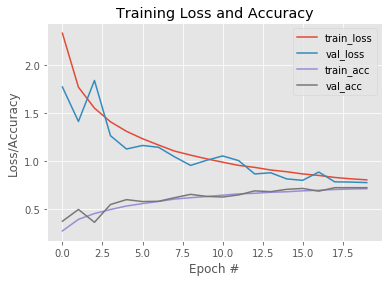

In [0]:
# evaluate the network
print("[INFO] evaluating network...")

# get predictions on the test set
predictions = model.predict(x_test, batch_size=128)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


print(classification_report(y_test.argmax(axis=1),
predictions.argmax(axis=1),
target_names=cifar10_labels))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), hist.history["loss"], label="train_loss" )
plt.plot(np.arange(0, 20), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), hist.history["acc" ], label="train_acc" )
plt.plot(np.arange(0, 20), hist.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

**12 - LeNet**

In [0]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 3s - loss: 2.0942 - acc: 0.2462 - val_loss: 1.9170 - val_acc: 0.3192

Epoch 00001: val_loss improved from inf to 1.91699, saving model to model.weights.best.hdf5
Epoch 2/20
 - 3s - loss: 1.8356 - acc: 0.3557 - val_loss: 1.7351 - val_acc: 0.3842

Epoch 00002: val_loss improved from 1.91699 to 1.73515, saving model to model.weights.best.hdf5
Epoch 3/20
 - 3s - loss: 1.6888 - acc: 0.4024 - val_loss: 1.6080 - val_acc: 0.4322

Epoch 00003: val_loss improved from 1.73515 to 1.60798, saving model to model.weights.best.hdf5
Epoch 4/20
 - 3s - loss: 1.5854 - acc: 0.4378 - val_loss: 1.5097 - val_acc: 0.4748

Epoch 00004: val_loss improved from 1.60798 to 1.50968, saving model to model.weights.best.hdf5
Epoch 5/20
 - 3s - loss: 1.5138 - acc: 0.4626 - val_loss: 1.4907 - val_acc: 0.4604

Epoch 00005: val_loss improved from 1.50968 to 1.49069, saving model to model.weights.best.hdf5
Epoch 6/20
 - 3s - loss: 1.4586 - acc: 0.4836 - val_los

In [0]:
model.load_weights('model.weights.best.hdf5')

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.5947


[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.54      0.81      0.64      1000
  automobile       0.80      0.65      0.72      1000
        bird       0.39      0.62      0.48      1000
         cat       0.48      0.29      0.36      1000
        deer       0.58      0.44      0.50      1000
         dog       0.62      0.40      0.48      1000
        frog       0.62      0.76      0.68      1000
       horse       0.76      0.60      0.67      1000
        ship       0.70      0.72      0.71      1000
       truck       0.64      0.67      0.66      1000

   micro avg       0.59      0.59      0.59     10000
   macro avg       0.61      0.59      0.59     10000
weighted avg       0.61      0.59      0.59     10000



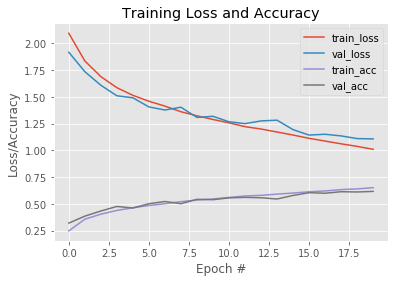

In [0]:
# evaluate the network
print("[INFO] evaluating network...")

# get predictions on the test set
predictions = model.predict(x_test, batch_size=128)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


print(classification_report(y_test.argmax(axis=1),
predictions.argmax(axis=1),
target_names=cifar10_labels))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), hist.history["loss"], label="train_loss" )
plt.plot(np.arange(0, 20), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), hist.history["acc" ], label="train_acc" )
plt.plot(np.arange(0, 20), hist.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np

def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

input_shape = (32, 32, 3)

#Instantiate an empty model
model = Sequential([
Conv2D(64, (3, 3), input_shape=input_shape, padding='same', activation='relu'),
Conv2D(64, (3, 3), activation='relu', padding='same'),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Conv2D(128, (3, 3), activation='relu', padding='same'),
Conv2D(128, (3, 3), activation='relu', padding='same',),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Conv2D(256, (3, 3), activation='relu', padding='same',),
Conv2D(256, (3, 3), activation='relu', padding='same',),
Conv2D(256, (3, 3), activation='relu', padding='same',),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Conv2D(512, (3, 3), activation='relu', padding='same',),
Conv2D(512, (3, 3), activation='relu', padding='same',),
Conv2D(512, (3, 3), activation='relu', padding='same',),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Conv2D(512, (3, 3), activation='relu', padding='same',),
Conv2D(512, (3, 3), activation='relu', padding='same',),
Conv2D(512, (3, 3), activation='relu', padding='same',),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Flatten(),
Dense(4096, activation='relu'),
Dense(4096, activation='relu'),
Dense(10, activation='softmax')
])

model.summary()

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 8, 8, 256)         295168    
__________

In [0]:
opt = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, 
                  metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 34s - loss: 2.3256 - acc: 0.1000 - val_loss: 2.3028 - val_acc: 0.0972

Epoch 00001: val_loss improved from inf to 2.30277, saving model to model.weights.best.hdf5
Epoch 2/20
 - 28s - loss: 2.3027 - acc: 0.0988 - val_loss: 2.3027 - val_acc: 0.0972

Epoch 00002: val_loss improved from 2.30277 to 2.30274, saving model to model.weights.best.hdf5
Epoch 3/20
 - 28s - loss: 2.3027 - acc: 0.0985 - val_loss: 2.3028 - val_acc: 0.0920

Epoch 00003: val_loss did not improve from 2.30274
Epoch 4/20
 - 28s - loss: 2.3027 - acc: 0.0994 - val_loss: 2.3028 - val_acc: 0.0920

Epoch 00004: val_loss did not improve from 2.30274
Epoch 5/20
 - 28s - loss: 2.3027 - acc: 0.0981 - val_loss: 2.3027 - val_acc: 0.0920

Epoch 00005: val_loss did not improve from 2.30274
Epoch 6/20
 - 28s - loss: 2.3027 - acc: 0.1006 - val_loss: 2.3028 - val_acc: 0.0920

Epoch 00006: val_loss did not improve from 2.30274
Epoch 7/20
 - 28s - loss: 2.3027 - acc: 0.0996 - 

##Exercício

1. Compare a arquitetura criada LENET com a AlexNet. Quais são as principais diferenças? Formule uma nova arquitetura da AlexNet.

2. Compare a arquitetura criada MiniVGG com a VGG16. Quais são as principais diferenças? Formule uma nova arquitetura VGG16.

1 - A lenet possui 8 camadas, enquanto a Alexnet possui 15.  A lenet aumenta gradualmente a quantidade e tamanho de seus filtros, enquanto a Alexnet ja inicializa com 96 filtros de tamanho 55x55 e vai gradualmente diminuindo de tamanho e aumento na quantidade de filtros.

2 - A implementação da MiniVGG possui a metade da quantidade de filtros da proposta pela VGG16 nas duas camadas iniciais (32 MiniVGG e 64 VGG16 respectivamente). Nota-se também a presença de camandas de batch normalization após as camadas convolutivas. Também fica evidenciado a utilização de camadas com menos de 128 filtros e a ausência de camadas totalmente conectadas. 

 

# **MiniVgg2**

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dropout

def build_NewMiniVGG(width, height, depth, classes):
  # initialize the model
  model = Sequential()
  inputShape = (height, width, depth)
  model.add(Conv2D(32, (3, 3), padding="same",
  input_shape=inputShape))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(Conv2D(64, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  # second CONV => RELU => CONV => RELU => POOL layer set
  model.add(Conv2D(64, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(Conv2D(128, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  # third CONV => RELU => CONV => RELU => CONV => RELU => POOL layer set
  model.add(Conv2D(256, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(Conv2D(512, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(Conv2D(512, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  # first (and only) set of FC => RELU layers
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  # softmax classifier
  model.add(Dense(classes))
  model.add(Activation("softmax"))
  
  model.summary()
  
  # return the constructed network architecture
  return model

In [6]:
opt = SGD(lr=0.01)
model = build_NewMiniVGG(width=32, height=32, depth=3, classes=10)
model.compile(loss='categorical_crossentropy', optimizer=opt, 
                  metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_2

In [7]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.newvgg.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 34s - loss: 2.1814 - acc: 0.2933 - val_loss: 2.1720 - val_acc: 0.2880

Epoch 00001: val_loss improved from inf to 2.17203, saving model to model.weights.best.newvgg.hdf5
Epoch 2/20
 - 26s - loss: 1.6443 - acc: 0.4307 - val_loss: 1.4622 - val_acc: 0.4806

Epoch 00002: val_loss improved from 2.17203 to 1.46220, saving model to model.weights.best.newvgg.hdf5
Epoch 3/20
 - 26s - loss: 1.4165 - acc: 0.5049 - val_loss: 1.3166 - val_acc: 0.5224

Epoch 00003: val_loss improved from 1.46220 to 1.31660, saving model to model.weights.best.newvgg.hdf5
Epoch 4/20
 - 26s - loss: 1.2604 - acc: 0.5536 - val_loss: 1.1021 - val_acc: 0.6052

Epoch 00004: val_loss improved from 1.31660 to 1.10213, saving model to model.weights.best.newvgg.hdf5
Epoch 5/20
 - 26s - loss: 1.1305 - acc: 0.6004 - val_loss: 1.1501 - val_acc: 0.6034

Epoch 00005: val_loss did not improve from 1.10213
Epoch 6/20
 - 26s -

In [0]:
model.load_weights('model.weights.best.newvgg.hdf5')

In [9]:

score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7904


[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.85      0.77      0.81      1000
  automobile       0.93      0.87      0.90      1000
        bird       0.81      0.64      0.71      1000
         cat       0.57      0.69      0.62      1000
        deer       0.74      0.79      0.76      1000
         dog       0.72      0.67      0.69      1000
        frog       0.80      0.88      0.84      1000
       horse       0.87      0.81      0.84      1000
        ship       0.84      0.92      0.88      1000
       truck       0.84      0.89      0.86      1000

   micro avg       0.79      0.79      0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000



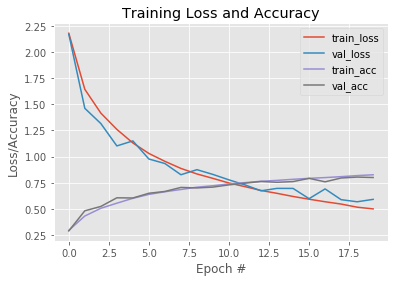

In [11]:
# evaluate the network
print("[INFO] evaluating network...")

# get predictions on the test set
predictions = model.predict(x_test, batch_size=128)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
                  'horse', 'ship', 'truck']


print(classification_report(y_test.argmax(axis=1),
predictions.argmax(axis=1),
target_names=cifar10_labels))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), hist.history["loss"], label="train_loss" )
plt.plot(np.arange(0, 20), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), hist.history["acc" ], label="train_acc" )
plt.plot(np.arange(0, 20), hist.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dropout

def build_NewAlexNet(width, height, depth, classes):
  # initialize the model
  model = Sequential()
  inputShape = (height, width, depth)
  model.add(Conv2D(64, (5, 5), input_shape=inputShape))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(Dropout(0.25))
  
  
  model.add(Conv2D(64, (5, 5)))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(Dropout(0.25))
  
  model.add(Flatten())
  model.add(Dense(1024))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(Dense(512))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  # softmax classifier
  model.add(Dense(classes))
  model.add(Activation("softmax"))
  
  model.summary()
  
  # return the constructed network architecture
  return model

In [13]:
opt = SGD(lr=0.01)
model = build_NewAlexNet(width=32, height=32, depth=3, classes=10)
model.compile(loss='categorical_crossentropy', optimizer=opt, 
                  metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 64)        4864      
_________________________________________________________________
activation_10 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 32)        18464     
_________________________________________________________________
activation_11 (Activation)   (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 12, 12, 32)        48        
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 32)        0         
__________

In [14]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.newalexnet.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 6s - loss: 2.5871 - acc: 0.2006 - val_loss: 2.2200 - val_acc: 0.2248

Epoch 00001: val_loss improved from inf to 2.22005, saving model to model.weights.best.newalexnet.hdf5
Epoch 2/20
 - 5s - loss: 1.9795 - acc: 0.3014 - val_loss: 1.7866 - val_acc: 0.3490

Epoch 00002: val_loss improved from 2.22005 to 1.78656, saving model to model.weights.best.newalexnet.hdf5
Epoch 3/20
 - 4s - loss: 1.7220 - acc: 0.3783 - val_loss: 2.0580 - val_acc: 0.3440

Epoch 00003: val_loss did not improve from 1.78656
Epoch 4/20
 - 4s - loss: 1.5851 - acc: 0.4190 - val_loss: 1.4243 - val_acc: 0.4692

Epoch 00004: val_loss improved from 1.78656 to 1.42433, saving model to model.weights.best.newalexnet.hdf5
Epoch 5/20
 - 5s - loss: 1.5002 - acc: 0.4514 - val_loss: 1.5325 - val_acc: 0.4392

Epoch 00005: val_loss did not improve from 1.42433
Epoch 6/20
 - 5s - loss: 1.4261 - acc: 0.4812 - val_loss: 1.3336 - val_acc: 0.5194

Epoch 00006: val_loss improv

In [0]:
model.load_weights('model.weights.best.newalexnet.hdf5')

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6634


[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.71      0.73      0.72      1000
  automobile       0.83      0.81      0.82      1000
        bird       0.76      0.34      0.47      1000
         cat       0.46      0.41      0.43      1000
        deer       0.50      0.70      0.58      1000
         dog       0.55      0.60      0.57      1000
        frog       0.74      0.73      0.74      1000
       horse       0.61      0.81      0.70      1000
        ship       0.88      0.72      0.79      1000
       truck       0.75      0.78      0.76      1000

   micro avg       0.66      0.66      0.66     10000
   macro avg       0.68      0.66      0.66     10000
weighted avg       0.68      0.66      0.66     10000



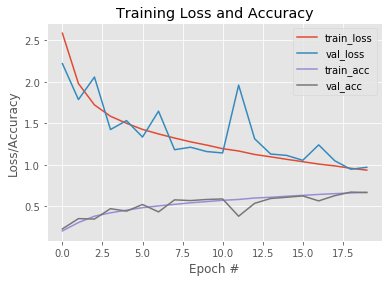

In [17]:
# evaluate the network
print("[INFO] evaluating network...")

# get predictions on the test set
predictions = model.predict(x_test, batch_size=128)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
                  'horse', 'ship', 'truck']


print(classification_report(y_test.argmax(axis=1),
predictions.argmax(axis=1),
target_names=cifar10_labels))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), hist.history["loss"], label="train_loss" )
plt.plot(np.arange(0, 20), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), hist.history["acc" ], label="train_acc" )
plt.plot(np.arange(0, 20), hist.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()